# Introdução

O campo da física de altas energias busca compreender as quatro principais forças que regem as interações entre partículas. As informações necessárias para este estudo são coletadas a partir do estudo de uma classificação específica de partículas, que são produzidas em condições extremas.

A única forma conhecida de se gerar e analisar tais partículas é por meio de colisões realizadas em aceleradores de partículas, porém nem toda colisão gera dados relevantes. Na realidade, o Grande Colisor de Hadrons (LHC) gera em média três partículas de interesse (denominadas partículas exóticas) a cada $10^9$ colisões. As colisões restantes geram partículas denominadas background, e não são utilizadas.

Dada a quantidade de colisões realizada por hora, e a complexidade de se analisar os dados obtidos, há um grande interesse em desenvolver uma forma automatizada de se diferenciar partículas exóticas das background. Para realizar esta diferenciação, são utilizados 18 dados. Destes, 8 são dados cinéticos coletados por detectores dentro do próprio acelerador de partículas, enquanto os 10 restantes são calculados em função dos anteriores.

O dataset analizado, denominado SUSY, apresenta um total de cinco milhões de instâncias de partículas teóricas. Cada uma possui 18 variáveis numéricas representando os dados utilizados para a diferenciação entre partículas exóticas e background, e uma variável booleana que representa a **qual destas classificações** a partícula em questão se encaixa. Os dados do dataset SUSY foram gerados a partir de simulações Monte Carlo, ou seja, não são produto de colisões reais.

# Objetivos
## Geral
Leonardo
    Determinar modelo de predição para classificar se a particula é exotica ou não.
## Especificos
Leonardo
    Determinar a melhor metrica para avaliar os resultados exemplos (precisão, acurácia, falso positivo, falso negativo) e porque

# Informações do Dataset

Importando bibliotecas para manipulação do Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importando Dataset, e separando entre variáveis dependentes e independentes:

Como o dataset é muito extenso, será utilizada a técnica do **memmap** que são usados para acessar pequenos segmentos de arquivos grandes no disco, sem carregar todo o arquivo na memória. [(NUMPY_MEMMAP)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html)

In [2]:
a = np.memmap('data_x.mymemmap', dtype='float32', mode='w+', shape=(4999999,18))
a[:] = pd.read_csv('SUSY.csv').iloc[:,1:19].values
del a
data_x = np.memmap('data_x.mymemmap', dtype='float32', mode='r+', shape=(4999999,18))

b = np.memmap('data_y.mymemmap', dtype='float32', mode='w+', shape=(4999999))
b[:] = pd.read_csv('SUSY.csv').iloc[:,0].values
del b
data_y = np.memmap('data_y.mymemmap', dtype='float32', mode='r+', shape=(4999999))

Agora, separando as variáveis entre dataset de treino e dataset de teste, utilizando o train_test_split [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do scikitlearn

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x,data_y, test_size = 0.25, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Analisando o Dataset agora. Para tal, temos que importá-lo na memória. Após análise básica, podemos deletar.

In [4]:
dataset = pd.read_csv('SUSY.csv')

In [5]:
dataset.head()

,0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
0,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
1,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
2,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
3,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
4,0.0,0.456398,1.099371,1.512453,0.751772,0.638967,-0.742216,0.322601,1.321054,0.169502,0.359941,0.489256,0.416168,0.754829,0.303750,0.461067,0.345541,0.733242,0.186044


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999999 entries, 0 to 4999998
Data columns (total 19 columns):
0.000000000000000000e+00     float64
9.728614687919616699e-01     float64
6.538545489311218262e-01     float64
1.176224589347839355e+00     float64
1.157156467437744141e+00     float64
-1.739873170852661133e+00    float64
-8.743090629577636719e-01    float64
5.677649974822998047e-01     float64
-1.750000417232513428e-01    float64
8.100607395172119141e-01     float64
-2.525521218776702881e-01    float64
1.921887040138244629e+00     float64
8.896374106407165527e-01     float64
4.107718467712402344e-01     float64
1.145620822906494141e+00     float64
1.932632088661193848e+00     float64
9.944640994071960449e-01     float64
1.367815494537353516e+00     float64
4.071449860930442810e-02     float64
dtypes: float64(19)
memory usage: 724.8 MB


In [7]:
dataset.describe()

,0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
count,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06,4.999999e+06
mean,4.575655e-01,1.000318e+00,2.179504e-05,-5.018183e-05,9.994304e-01,-3.678343e-05,-1.954757e-05,9.999745e-01,3.545853e-05,1.001437e+00,-4.873422e-05,1.000360e+00,9.999559e-01,9.999165e-01,1.000421e+00,1.000112e+00,1.000192e+00,9.994851e-01,2.249139e-01
std,4.981961e-01,6.873341e-01,1.003107e+00,1.001670e+00,6.542200e-01,1.002839e+00,1.001631e+00,8.728877e-01,1.001654e+00,8.901669e-01,1.001594e+00,6.288446e-01,5.841140e-01,4.708406e-01,8.592492e-01,6.207164e-01,6.237673e-01,4.360949e-01,1.969804e-01
min,0.000000e+00,2.548815e-01,-2.102927e+00,-1.734789e+00,4.285860e-01,-2.059306e+00,-1.734202e+00,2.598711e-04,-1.727117e+00,7.693475e-08,-1.671863e+01,2.673070e-01,1.041228e-03,2.048078e-03,0.000000e+00,2.734135e-02,4.452858e-03,3.211849e-07,4.172130e-08
25%,0.000000e+00,5.624837e-01,-7.573516e-01,-8.673567e-01,5.969881e-01,-7.695912e-01,-8.683741e-01,4.784546e-01,-8.661510e-01,3.691849e-01,-4.923983e-01,5.883285e-01,6.223411e-01,6.505438e-01,1.705213e-01,5.985209e-01,5.134394e-01,6.879128e-01,6.908195e-02
50%,0.000000e+00,7.915511e-01,1.339398e-04,-3.887097e-04,7.997993e-01,-3.792388e-04,2.009779e-04,7.738360e-01,-9.172366e-03,8.019273e-01,-8.037898e-02,8.286114e-01,8.781311e-01,9.344711e-01,9.018388e-01,8.355336e-01,9.142514e-01,1.094396e+00,1.672500e-01
75%,1.000000e+00,1.204413e+00,7.576488e-01,8.670981e-01,1.162353e+00,7.692302e-01,8.674778e-01,1.207444e+00,8.687620e-01,1.375392e+00,3.489010e-01,1.211083e+00,1.220313e+00,1.283522e+00,1.613231e+00,1.207994e+00,1.384583e+00,1.369183e+00,3.303655e-01
max,1.000000e+00,2.055345e+01,2.101605e+00,1.734839e+00,3.303562e+01,2.059721e+00,1.734686e+00,2.106888e+01,1.740689e+00,2.338644e+01,2.048790e+01,2.107572e+01,1.616682e+01,6.731210e+00,2.068624e+01,2.115226e+01,1.561370e+01,1.591660e+00,1.000000e+00


In [8]:
# dataset['1.145620822906494141e+00']
total = 0
for x in range(len(dataset['1.145620822906494141e+00'])):
    if dataset['1.145620822906494141e+00'][x] == 0:
        total = total + 1
print(total)

1061873


# Algoritmos de Classificação

A equipe utilizou como guia inicial para a escolha do algorítmo de classificação a documentação fornecida pelo sklearn, pois compõe uma relação compacta das variáveis a serem consideradas a cerca dos dados e tipo de classificação do problema quanto ao mesmo ser de aprendizado não supervisionado ([documentacao](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)). A imagem guia está disponível abaixo.

![imgsklearn](https://preview.ibb.co/g4d0hS/sklearn.png)

A premissa primeira engloba o fato de o problema ser de classificação, tal que os dados possuem labels bem definidas, binárias, que classificam uma partícula em exótica ou background. Tendo em vista o conjunto de 5.000.000 de dados na base de dados SUSY, foi preciso realizar a leitura de apenas uma parte dos mesmos, com o intuito principalmente de que os membros da equipe se tornassem familiarizados com o processo. Por esse motivo, foi utilizado inicialmente o KNN ou KNeighborsClassifier. 

A princípio mostrou resultados razoáveis, como é possível ver [aqui](#knnAcuracia), entretanto, o número de dados processados não englobava todos os registros do dataset e notou-se que esse método não era recomendado para conjunto de dados maiores que 100k. A incompatibilidade relatada, pode ser observada devido ao fato de que com acréscimos no número de registros a serem processados o algorítmo se tornava demasiadamente lento, como é possível observar na seção [Tempo de Execução](#tempoExecucao). É importante salientar que a análise desse algorítmo foi realizada pela equipe considerando apenas as últimas 8 colunas, pois a equipe raciocinou que, como elas eram funções das 10 primeiras poderia apresentar uma maior independência entre si, os resultados apresentados aqui, consideram essa condição. A partir de então, a equipe optou por testar [SGDClassifier], primeira opção para um conjunto de dados dessa dimensão, notando-se que o algorítmo não apresentou o resultado esperado o grupo optou por utilizar o Kernel Aproximate e o GBC.

## Nearest Neighbors Classification

A classificação baseada em vizinhos é um tipo de aprendizado que se baseia em intâncias : não tenta construir um modelo interno geral, mas simplesmente armazena instâncias dos dados de treinamento. A classificação é calculada a partir de uma votação simples dos vizinhos mais próximos de cada ponto.

A classificação básica de vizinhos mais próximos usa pesos uniformes: o valor atribuído a um ponto é calculado a partir de uma votação simples por maioria  dos vizinhos mais próximos. Em algumas circunstâncias, é melhor ponderar os vizinhos de tal forma que os vizinhos mais próximos contribuam mais para o ajuste.

[Documentação](http://scikit-learn.org/stable/modules/neighbors.html#classification)


## KNeighborsClassifier

É um algorítmo classificador que implementa o voto entre os k vizinhos mais próximos. 

[Documentação](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


## SGD - Stochastic Gradient Descent

O Algorítmo SGD é uma abordagem simples porém eficiente, sendo esta abordagem, facilmente implementada. A abordagem SGD é utilizada para modelos discriminativos com classificadores lineares sobre funções convexas de perda, tais como a regressão linear.Bastante aplicado em aprendizado de larga escala, o SGDClassifier é a alternativa para bases de dados em que o KNeighborsClassifier se mostra ineficiente.

Por trabalhar com bases de dados de grande volume, o SGD necessita de hiper parametros, ou seja, necessita que sejam analisadas as features mais relevantes. Isso se alcança com uma boa feature selection antes de se aplicar o SGD Classifier.

[Documentação](http://scikit-learn.org/stable/modules/sgd.html)


## SGDClassifier

É um algorítmo classificador que implementa modelos lineares utilizando curvas de gradiente.

[documentacao](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)


##  Gradient Tree Boosting

O Gradient Boosting ou Gradient Boosted Regression Trees (GBRT) é uma generalização de estímulo/impulsionamento para funções de perda arbitrariamente diferenciáveis. O GBRT é um procedimento pronto e efetivo que pode ser usado tanto para problemas de regressão quanto de classificação. Modelos de Gradient Tree Boosting são usados ​​em uma variedade de áreas, incluindo ranking de busca na Web e ecologia.


## GradientBoostingClassifier

É usado em problemas de classificação e suporta classificação binária e multi-classe. 

O número de apredizes fracos ou árvores de regressão pode ser controlado pelo parâmetro n_estimators, além disso, o tamanho de cada árvore é definido pela profundidade da árvore via max_depth definindo o número de nós de folha via max_leaf_nodes. O learning_rate é um hiper-parâmetro no intervalo (0.0, 1.0) que controla o overfitting através do encolhimento .

[GradientBoosting](http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)


KNN,SGD,KA,GBC colocar imagem do sklearnin de seleção dos algoritmos  
Rafael, Adrianne

# Análise das Features

Gesiel falar sobre as variações dos modelos e pré concluir.

## Pré Processamento

    O pré processamento de dados é uma fase no aprendizado de maquina que busca avaliar a qualidade dos dados e suas relações, e se iniciar logo depois de os dados terem sido coletados e organizados em um conjunto de dados. Essa fase se dá pelo fato de existirem diversos problemas nos dados que precisam ser solucionados como por exemplo: dados faltando, dados corrompidos, dados irrelevantes e valores desconhecidos.
    
    Uma caracteristica que os algoritmos de AM, vem assumindo é determinar que os dados já vem pré processados, isso porque a comunidade de AM usam os repositorios de dados para obter conjuntos de dados para utilização e por essa razão não apresentam varios problemas que podem ser encontrados em dados coletados no mundo real e acabam não realizando a fase de pré processamento.
    
    Diante desde dilema e pelo fato de o dataset SUSY possuir um conjunto de dados de cinco milhoes de registro e 18 variaveis independentes, esta sessão possue por objetivo buscar reduzir as variaveis independentes(features) do dataset, afim de melhorar o processamento e os resultados obtidos após o processamento e analise dos resultados, dessa forma varias tecnicas de redução de featues juntamente com analise gráfica seram utiladas em conjunto para determinar se é possivel reduzir as features.
    
    Este objetivo foi proposto depois de uma analise da estrutura dos dados e visualização dos mesmos utilizando tecnicas de visualização de dados, foi observado que os dados já foram pré processados como pode ser observado: não existem dados faltando, não existem dados corrompidos e não existem valores corrompidos.
    
    Analisando dois trabalhos feitos utilizando este mesmo conjunto de dados(SUSY) disponíveis em: [Searching for Exotic Particles in ...](https://arxiv.org/pdf/1402.4735.pdf) e [Modelo preditivo de Susy ...](http://machinelearningandspark.blogspot.com.br/2016/07/susy-dataset.html), notou-se que os melhores resultados foram obtidos utilizando todas as features
    
    
## Redução de Features

### Correlação

A matriz de correlação é composta pelos coeficientes de correlação (por padrão, o coeficiente de Pearson) entre cada par de colunas. Um alto coeficiente indica um par de colunas que tendem a conter informação similar, ou até mesmo redundante. A seleção de colunas por filtragem de alta correlação depende da definição de um limiar de correlação máxima - ou threshold. A escolha deste limiar, em geral, é feita por tentativa e erro.

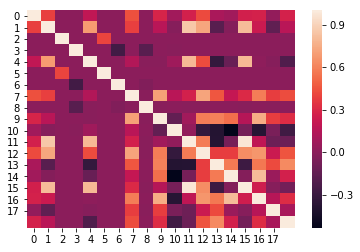

In [13]:
import seaborn as sns

corr = dataset.corr()
sns.heatmap(corr, xticklabels=range(18), yticklabels=range(18))

###  Seleção Univariada

Este método realiza testes estatísticos individualmente em cada coluna, e calcula um score. Os scores mais altos podem ser então selecionados.

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

array = dataset.values
X = array[:, 1:]
Y = array[:, 0]
# feature extraction
test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

[8.829e+05 5.370e-01 1.065e+00 1.972e+05 7.207e-01 4.910e-02 1.192e+06
 6.008e-02 4.346e+05 2.988e+04 3.825e+05 1.090e+06 6.344e+04 3.174e+04
 3.575e+05 4.026e+05 5.338e+03 3.893e+05]
[[1.668 3.475 0.013 1.046 0.568 0.448 0.205 0.378]
 [0.445 1.22  1.831 0.526 0.942 0.603 1.562 0.181]
 [0.381 2.033 3.046 0.569 1.015 0.761 1.715 0.091]
 [1.31  1.088 0.589 1.179 0.968 1.083 0.043 0.095]
 [0.456 0.323 0.17  0.489 0.416 0.461 0.346 0.186]]


### Recursive Feature Elimination

A Recursive Feature Elimination (ou RFE) consiste na remoção de maneira recursiva de atributos e construção de modelo com os que permanecem. De maneira geral, utiliza a precisão de um modelo para identificar quais atributos são mais relevantes para a predição.

<Container object of 18 artists>

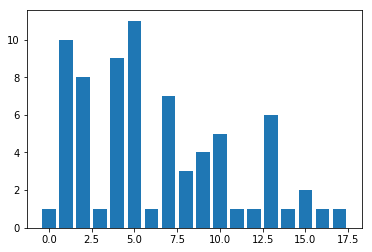

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, Y)

plt.bar(range(18), fit.ranking_)

### Principal Component Analysis (PCA)

A Análise de Componentes Principais, ou Principal Component Analysis (PCA), é um procedimento estatístico destinado à redução de dimensionalidade. Ele transforma um conjunto de variáveis independentes em um conjunto menor ou igual a partir da variância. É calculado um índice que ordena as colunas, sendo a primeira coluna selecionada, ou seja, o primeiro componente principal, o que apresenta a maior variância. Os componentes seguintes são ordenados também por variância, mas com a restrição de que sejam ortogonais aos anteriores, condição esta que garante que sejam independente, ou não correlacionados.

In [16]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.215 0.147 0.126]
[[ 2.174e-01 -7.178e-04  2.596e-03  1.082e-01 -4.218e-04  3.437e-04
   4.145e-01 -2.391e-03  4.744e-01 -2.552e-01  1.629e-01  3.333e-01
   1.723e-01  3.729e-01  1.905e-01  3.563e-01  8.061e-02  5.369e-02]
 [ 3.917e-01 -3.124e-03 -2.573e-03  3.871e-01 -3.265e-03  9.064e-04
   1.631e-01 -2.571e-03 -1.102e-01  3.968e-01  3.961e-01  1.332e-01
  -2.120e-01 -3.647e-01  3.627e-01 -1.166e-01 -4.093e-02 -3.339e-02]
 [ 2.105e-03  7.073e-01  4.551e-03  1.767e-03  7.069e-01 -2.330e-03
   1.160e-03 -3.037e-03 -1.561e-04  1.281e-03  1.877e-03  9.714e-04
  -6.715e-04 -1.607e-03  1.759e-03 -5.339e-04 -6.982e-05  9.039e-05]]


### Feature Importance

Além dos métodos apresentados anteriormente, é possível utilizar árvore de decisão (Random Forest e Extra Trees) para estimar a importância das features. Abaixo tem um exemplo de aplicação de ExtraTrees, em que se constrói um modelo e a partir dele é calculada uma importância para cada feature. Nesse caso, pode-se dizer que class, lepton 2 phi e M_R são os três elementos mais importantes.

<Container object of 18 artists>

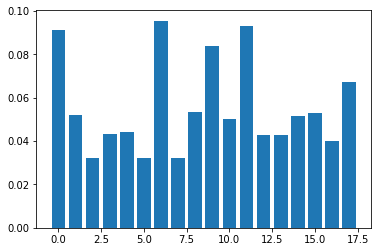

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
plt.bar(range(18), model.feature_importances_)

In [18]:
#del dataset

## Teste Redução
    Testar as features com os algoritmos SGD, GBC de classificação
    Afonso
## Conclusão Análise Features
    Afonso
Concluir que é melhor não reduzir as features

# Conclusão

## Algoritmo utilizado
Para a Solução do Problema, a equipe fez o uso de 3 algorítmos diferentes. 

A primeira abordagem que tomamos para a resolução do problema, foi implementar o *Nearest Neighbors Classification*. Durante a aplicação do algorítmo KNN, observamos certa demora na execução do código, entretanto, ao final do teste, foi possível obter, com 17 vizinhos e 500.000 amostras, o resultado ótimo para o algorítmo, que foi uma acurácia de 0.78437066, obtida após a feature selection, sendo a acurácia, utilizando todas as features, equivalente a cerca de 0.76. 

Entretanto, após consulta do site da biblioteca Sklearn e também análise da ineficiência do algoritmo, por parte da equipe, concluiu-se que o uso do algorítmo KNN era inedequado para uma base de dados da dimensão da nossa, visto que, este algorítmo, é adequado para um máximo de 100.000 amostras e nossa base tinha 5.000.000.

Visto a ineficiência do KNN, apesar do resultado razoável, decidimos fazer uso do *Stochastic Gradient Descent*. Com o uso do algorítmo SGD, além de reduzir drasticamente o tempo de execução do algorítmo, reduzindo o tempo de varios minutos para segundos, foi possível obter um resultado melhor ainda! A acurácia aumentou para 0.7884, utilizando todas as features do dataset, apesar do resultado, não foram feitas alterações posteriores ou a aplicação da feature selection com o SGD.

Apesar de já ter obtido bons resultados utilizando o SGD, a equipe também implementou o *Gradient Boosting* ou *Gradient Boosted Regression Trees Classifier*. O algorítmo GBRT melhorou ainda mais o resultado obtido pela equipe, tendo, ao final, com as 5 milhões de amostras, dataset de treino de 75% e min_samples_split de 700, obter o melhor resultado. Sendo esta, uma acurácia total e final de 0.8031416 nos testes.

## Resultados Obtidos
Thiago
    Apresentar resultados obtidos, gráficos e resultados da mensuração

## Referências

BATISTA, Gustavo Enrique de Almeida Prado Alves. Pré-processamento de dados em aprendizado de máquina supervisionado. 2003. Tese (Doutorado em Ciências de Computação e Matemática Computacional) - Instituto de Ciências Matemáticas e de Computação, Universidade de São Paulo, São Carlos, 2003. doi:10.11606/T.55.2003.tde-06102003-160219. Acesso em: 2018-04-16.